**Vamos treinar o modelo com as classes desbalanceadas?**

In [1]:
import pickle
with open('../sample_data/breast_cancer.pkl','rb') as f:
  X_treino, x_teste, y_treino, y_teste = pickle.load(f)

In [2]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators = 100, max_features = 6, criterion = 'entropy', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_features=6, random_state=0)

In [3]:
previsoes = modelo.predict(x_teste)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste, previsoes)

0.7413793103448276

In [5]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[35,  5],
       [10,  8]], dtype=int64)

0.7413793103448276

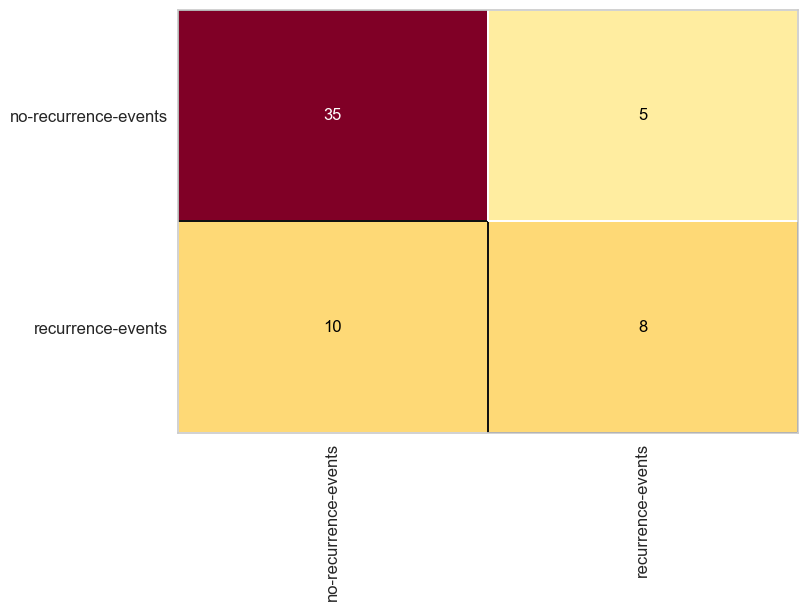

In [6]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(x_teste, y_teste)

**A classe majoritária está muito mais baixa que a minoritária - desbalanceamento**

In [7]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.88      0.82        40
   recurrence-events       0.62      0.44      0.52        18

            accuracy                           0.74        58
           macro avg       0.70      0.66      0.67        58
        weighted avg       0.73      0.74      0.73        58



**Vamos balancear os dados usando um metódo undersampling**

In [8]:
!pip install imbalanced-learn

In [9]:
from imblearn.under_sampling import TomekLinks

In [10]:
balanceamento_under = TomekLinks(sampling_strategy = 'all')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [11]:
X_under.shape, y_under.shape

((202, 38), (202,))

**Quantas instâncias tinha em cada classe originalmente?**

In [12]:
import numpy as np
np.unique(y_treino, return_counts = True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([161,  67], dtype=int64))

**Quantas instâncias tem agora após o balanceamento?**

In [13]:
np.unique(y_under, return_counts=True) # reduziu algumas instâncias na classe majoritária

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([148,  54], dtype=int64))